In [11]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import random
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
size=150
data=[]
assign_dict = {"NORMAL":1, "PNEUMONIA":0}
def load_data(directory):
    for sub_directory in os.listdir(directory):
        if sub_directory=="NORMAL":
            inner_directory=os.path.join(directory,sub_directory)
            for i in os.listdir(inner_directory):
                img=cv2.imread(os.path.join(inner_directory,i),0)
                img=cv2.resize(img,(size,size))
                data.append([img,assign_dict[sub_directory]])
                
        if sub_directory=="PNEUMONIA":
            inner_directory=os.path.join(directory,sub_directory)
            for i in os.listdir(inner_directory):
                img=cv2.imread(os.path.join(inner_directory,i),0)
                img=cv2.resize(img,(size,size))
                data.append([img,assign_dict[sub_directory]])        
            
    random.shuffle(data)
    return np.array(data)

In [3]:
train=load_data('../input/chest-xray-pneumonia/chest_xray/train')
val = load_data('../input/chest-xray-pneumonia/chest_xray/val')
test = load_data('../input/chest-xray-pneumonia/chest_xray/test')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


<AxesSubplot:ylabel='count'>

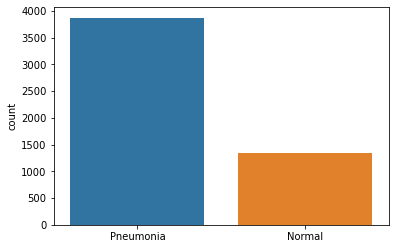

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.countplot(x = l)

## The dataset is imbalanced thus using data augmentation

In [5]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [6]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [7]:
# resize data for deep learning 
img_size = 150
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [12]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape=x_train.shape[1:]))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
adam = Adam(learning_rate=0.0001)

model.compile(optimizer = adam,metrics=['acc'] , loss = 'binary_crossentropy' )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 75, 75, 64)        300       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 32)        300       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:


fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()



for i, met in enumerate(['acc', 'loss','val_acc','val_loss']):
    ax[i].plot(history.history[met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm, linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = ['PNEUMONIA', 'NORMAL'], yticklabels =  ['PNEUMONIA', 'NORMAL'])

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")